In [20]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import polars as pl


In [21]:
dataset = pl.read_csv("dataset.csv")

In [22]:
dataset

6,148,72,35,0,33.6,0.627,50,1
i64,i64,i64,i64,i64,f64,f64,i64,i64
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
…,…,…,…,…,…,…,…,…
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.34,27,0
5,121,72,23,112,26.2,0.245,30,0


In [23]:
dataset.null_count()

6,148,72,35,0,33.6,0.627,50,1
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0


In [24]:
dataset

6,148,72,35,0,33.6,0.627,50,1
i64,i64,i64,i64,i64,f64,f64,i64,i64
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
…,…,…,…,…,…,…,…,…
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.34,27,0
5,121,72,23,112,26.2,0.245,30,0


In [25]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x=dataset[:,:8]
y=dataset[:,8]
x=scaler.fit_transform(x)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:

x_train=torch.tensor(x_train,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.float32).reshape(-1,1)
x_test=torch.tensor(x_test,dtype=torch.float32)
y_test=torch.tensor(y_test,dtype=torch.float32).reshape(-1,1)


In [28]:
x_train

tensor([[ 1.0000,  0.3902,  0.0000,  ...,  0.0968, -0.2647,  0.5882],
        [ 0.8000,  0.1707, -0.1111,  ..., -0.6989, -0.5505,  0.4706],
        [ 0.0000, -0.0244, -4.0000,  ..., -0.9140, -0.4823, -0.3529],
        ...,
        [-0.2000, -0.2195, -0.5556,  ..., -0.7312, -0.6370, -0.4706],
        [ 1.8000,  0.5610,  0.7222,  ...,  0.5806, -0.3329,  0.7059],
        [-0.4000, -0.8780,  0.0000,  ..., -0.5806, -0.2307, -0.2941]])

In [29]:
x_train=x_train+torch.normal(0.0,0.1,x_train.size())

In [30]:
torch.manual_seed(42)

In [31]:
from torch.utils.data import DataLoader,TensorDataset
batch_size=16
dataloader=DataLoader(TensorDataset(x_train, y_train),batch_size=batch_size,shuffle=True)

In [33]:
model=nn.Sequential(nn.Linear(8,16),nn.ReLU(),nn.Linear(16,12),nn.ReLU(),nn.Linear(12,8),nn.ReLU(),nn.Linear(8,4),nn.ReLU(),nn.Linear(4,1),nn.Sigmoid())
#model=nn.Sequential(nn.Linear(8,35),nn.ReLU(),nn.Linear(35,1),nn.Sigmoid())
from  torch.optim.lr_scheduler import ExponentialLR
#lr=0.0003866102198118817
lr=0.001
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=lr)
#scheduler = ExponentialLR(optimizer, gamma=0.9)

epochs=100
loss_total=[]
for epoch in range(epochs):
    epoch_loss=0
    batch_count=0
    for x_train_batch,y_train_batch in dataloader:
        y_pred=model(x_train_batch)
        loss=loss_fn(y_pred,y_train_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss+=loss.item()
        batch_count+=1
    #graph_title=f'Loss/epoch for learning rate {lr} epochs {epochs} and batchsize {batch_size}'
    #writer.add_scalar('Loss/epoch for ',epoch_loss/batch_count,epoch)
    print("Epoch ",epoch,"loss: ",epoch_loss/batch_count)
    loss_total.append(epoch_loss/batch_count)
    
model.eval()


Epoch  0 loss:  0.7067171289370611
Epoch  1 loss:  0.6896246106196673
Epoch  2 loss:  0.6679704372699444
Epoch  3 loss:  0.6278605201305487
Epoch  4 loss:  0.5724346446685302
Epoch  5 loss:  0.5329350019112612
Epoch  6 loss:  0.5116932988166809
Epoch  7 loss:  0.4991119419917082
Epoch  8 loss:  0.49509416940884715
Epoch  9 loss:  0.48410302324172777
Epoch  10 loss:  0.4810213851623046
Epoch  11 loss:  0.4772946677910976
Epoch  12 loss:  0.4772344308021741
Epoch  13 loss:  0.4725917818454596
Epoch  14 loss:  0.4673473284794734
Epoch  15 loss:  0.4716140574369675
Epoch  16 loss:  0.47019720230347073
Epoch  17 loss:  0.46594980359077454
Epoch  18 loss:  0.46758092519564504
Epoch  19 loss:  0.4611027160516152
Epoch  20 loss:  0.45405178306958616
Epoch  21 loss:  0.45483364164829254
Epoch  22 loss:  0.45639551870333844
Epoch  23 loss:  0.4519049765971991
Epoch  24 loss:  0.4522260064497972
Epoch  25 loss:  0.4544872970153124
Epoch  26 loss:  0.452156133376635
Epoch  27 loss:  0.448061709220

Sequential(
  (0): Linear(in_features=8, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=4, bias=True)
  (7): ReLU()
  (8): Linear(in_features=4, out_features=1, bias=True)
  (9): Sigmoid()
)

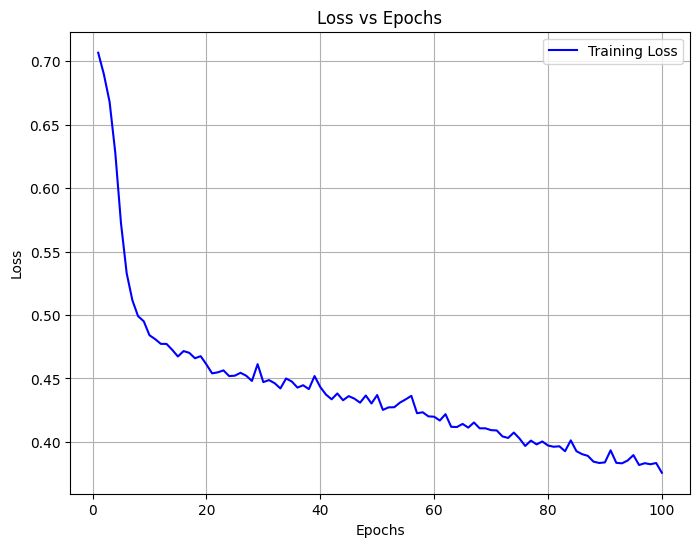

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), loss_total, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid(True)
plt.legend()
plt.show()

In [35]:
with torch.no_grad():
    y_pred=model(x_train)
    accuracy_train=(y_pred.round()==y_train).float().mean()
    print("train accuracy: ",accuracy_train)
    y_test_pred=model(x_test)
    accuracy_test=(y_test_pred.round()==y_test).float().mean()
    print("Test accuracy:",accuracy_test)
        

train accuracy:  tensor(0.8320)
Test accuracy: tensor(0.7792)
